# Identificação

Preencha os dados abaixo para facilitar a avaliação da sua solução (você deve entregar esse arquivo via e-disciplinas)

- **Nome:**
- **NUSP:**

# Planejamento Probabilístico

Nesta atividade iremos implementar dois algoritmos utilizados para solucionar Processos de Decisão Markovianos (MDPs).

Podemos considerar um MDP como como uma tupla $\langle S,A,R,P,\gamma \rangle$, onde:

- $S$ é um conjunto finito de estados do sistema;
- $A$ é um conjunto finito de ações que o agente pode executar;
- $R : S \times A \rightarrow \mathbb{R}$ é a função de recompensa que o agente recebe ao se chegar um determinado estado;
- $P(s'|s,a)$ define a probabilidade de transição de se alcançar um estado $s'$ a partir de um estado $s \in S$, executando a ação $a \in A$;
- $\gamma$ é o fator de desconto, tal que $0 \leq \gamma < 1$, onde a recompensa de $t$ etapas no futuro é descontada por $\gamma^{t}$.

Para encontrar uma solução ótima para este MDP utilizamos a _equação de Bellman_, que encontra a função valor ótima ($V^*$) para o nosso problema e é definida por:
    
$ V^*(s) = \max_{a \in A} \left\{ R(s) + \gamma \sum_{s' \in S} P(s'|s,a) V^*(s') \right\} $
    
Através dessa função podemos encontrar uma política, uma função $ \pi : S \rightarrow A $, que mapeia quais ações a serem executadas em cada estado. Uma _política ótima_ é aquela que devolve a melhor ação a ser executada para cada estado, e pode ser definida pela equação de Bellman como:
    
$ \pi^*(s) = arg \max_{a \in A} \left\{ R(s) + \gamma \sum_{s' \in S} P(s'|s,a) V^*(s') \right\} $

Os algoritmos que iremos ver nesta atividade utilizam estas equações para buscar soluções para os MDPs.

## 💻 Configurações

### Notebook

Este notebook pode ser executado de três formas:
- localmente com Python nativo, via uma execução local do Jupyter;
- localmente com docker, através da execução do comando `docker compose up` na raiz do projeto;
- remotamente via Google Colab

In [ ]:
%%bash
##
# Caso você queira rodar este notebook no Google, copie este notebook para o Colab e execute o conteúdo da célula abaixo
##

[[ ! -e /opt/google ]] && exit # Caso esta célula não esteja executando no Colab, interrompe sua execução aqui

echo "Running Google Colab commands"
rm -rf ./*

git clone https://github.com/danielbdias/mac0318-2021-atividades
mv ./mac0318-2021-atividades/* ./
rm -rf ./mac0318-2021-atividades
rm -rf ./sample_data

In [3]:
%%bash
# Para começar a executar este notebook, instale as dependências deste notebook
pip install -q -r requirements.txt

### Bibliotecas

Neste notebook utilizaremos o `numpy` para nos ajudar com funções auxiliares e algumas libs internas.

In [4]:
import numpy as np
import time

from scripts.structures.algorithm_statistics import AlgorithmStatistics
from scripts.problem_reader import read_problem_file
from scripts.helpers import plot_navigation_policy, plot_navigation_value_function, plot_residuals

## Iteração de valor

O algoritmo de Iteração de Valor busca utilizar a equação de Bellman diretamente em todos os estados para encontrar uma função valor ótima. Para isso ele realiza uma operação que chamamos de _Bellman Backup_, onde dado uma função valor no momento $t$, encontramos o valor dela no momento $t+1$ com a seguinte equação:

$ V^{t+1}(s) \leftarrow \max_{a \in A} \left\{ R(s) + \gamma  \sum_{s' \in S} P(s'|s,a) V^t(s') \right\} $

Como nesta formulação apenas a fução de probabilidade de transição depende da ação, tirar a função recompensa e o fator de desconto $\gamma$ da maximização e reescrever a formula como:

$ V^{t+1}(s) \leftarrow R(s) + \gamma \max_{a \in A} \left\{\sum_{s' \in S} P(s'|s,a) V^t(s') \right\} $

### 💡 Atividade

Dada a formulação acima, implemente o _Bellman Backup_.

Para auxiliar na implementação o objeto **mdp** que a função recebe tem dois atributos e duas funções auxiliares.
- atributo `actions`, que é uma lista de ações do MDP;
- atributo `states`, que é uma lista com todos os estados possíveis do MDP;
- função `transition(state, action, next_state)` que devolve a probabilidade de ir para o estado `next_state` dado que estou no estado `state` e executei a ação `action`;
- função `reward(state)`, que devolve a recompensa de se estar em um estado `state`;

In [5]:
def bellman_backup(mdp, value_function, state, gamma):
    """Executa um Bellman backup em um estado.
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    value_function (dict[string] -> float): Função valor contendo os valores de cada estado no instante t
    state (string): Estado atual para o qual executaremos o backup
    gamma (float): fator de desconto
    Returns:
    float: valor do estado em t + 1
    """
    return 0 # implementar aqui

### Erro residual máximo

Ao executarmos o _Bellman backup_ diversas vezes para todos os estados percebemos que a função valor converge para um ponto fixo, a função valor ótima. Quando executamos o _Bellman backup_ com a função valor ótima, percebemos que $V^{t+1}(s)$ não tem diferença em relação a $V^t(s)$.

Podemos utilizar isto no algoritmo como critério de parada, calculado o resíduo (a diferença) de $V^{t+1}(s)$ e $V^t(s)$ para todos os estados. Caso o resíduo máximo seja menor que um dado $\epsilon$ (geralmente um valor bem pequeno, como $10^{-8}$), podemos considerar que o algoritmo convergiu. Este _Erro residual_ ou _Erro de Bellman_ é dado pela função:

$residual(V^t, V^{t+1}) = \max_{s \in S} |V(s)^t - V(s)^{t+1}| $

### 💡 Atividade

Dada a formulação acima, implemente o _Erro residual máximo_.

In [6]:
def compute_maximum_residual(mdp, value_function_at_t, value_function_at_t_plus_1):
    """Calcula o erro residual máximo de duas funções valores.
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    value_function_at_t (dict[string] -> float): Função valor contendo os valores de cada estado no instante t
    value_function_at_t_plus_1 (dict[string] -> float): Função valor contendo os valores de cada estado no instante t + 1
    Returns:
    float: valor do estado em t + 1
    """
    return 0 # implementar aqui

Ao final da Iteração de Valor, podemos calcular o política encontrada pelo algoritmo, que pode ser dada pela função abaixo, derivada da fórmula de política ótima:

$ \pi^t(s) = arg\max_{a \in A} \left\{ R(s) + \gamma\sum_{s' \in S} P(s'|s,a) V^t(s') \right\} $

In [7]:
def compute_policy(mdp, gamma, value_function):
    """Calcula a política de uma função valor
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    gamma (float): fator de desconto
    value_function (dict[string] -> float): Função valor contendo os valores de cada estado no instante t
    Returns:
    (dict[string] -> string): política para a função valor atual
    """
    policy = {}

    for state in mdp.states:
        max_value = float("-inf")
        best_action = None

        for action in mdp.actions:
            sum = 0
        
            for next_state in mdp.states:
                sum += (mdp.transition(state, action, next_state) * value_function[next_state])

            sum = mdp.reward(state) + gamma * sum
                
            if sum > max_value:
                max_value = sum
                best_action = action

        policy[state] = best_action

    return policy

Por fim, podemos utilizar todas essas funções para estruturar o algoritmo de _Iteração de Valor_, conforme o código abaixo:

In [8]:
def value_iteration(mdp, gamma = 0.9, epsilon = 1e-8):
    """Soluciona um MDP através do algoritmo Iteração de Valor.
    Para a função valor inicial, utilizamos a heurística da recompensa máxima, onde  V^0(s) será a recompensa máximo encontrada na função recompensa.
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    gamma (float): fator de desconto
    epsilon (float): resíduo máximo a ser encontrado na função valor
    Returns:
    policy (dict[string] -> string): política ótima
    value_function_at_t (dict[string] -> float): função valor ótima
    statistics (AlgorithmStatistics): estatísticas da execução do problema
    """
    policy = dict(map(lambda state : (state, None), mdp.states))

    reward_heuristic = mdp.reward_matrix().max()
    value_function_at_t = dict(map(lambda state : (state, reward_heuristic), mdp.states))
    
    t = 0
    maximum_residuals = []
    bellman_backups_done = 0
    
    start = time.time()
    
    while True:
        value_function_at_t_plus_1 = dict(map(lambda state : (state, value_function_at_t[state]), mdp.states))

        # do bellman update
        for state in mdp.states:
            value_function_at_t_plus_1[state] = bellman_backup(mdp, value_function_at_t, state, gamma)
            bellman_backups_done = bellman_backups_done + 1

        iteration_residual = compute_maximum_residual(mdp, value_function_at_t, value_function_at_t_plus_1)
        value_function_at_t = value_function_at_t_plus_1

        # update statistics
        t = t + 1
        maximum_residuals.append(iteration_residual)

        if iteration_residual < epsilon:
            break # end loop
            
    # after finishing converging, compute policy and statistics
    policy = compute_policy(mdp, gamma, value_function_at_t)
    
    end = time.time()
    
    statistics = AlgorithmStatistics(t, maximum_residuals, bellman_backups_done, end-start)

    return policy, value_function_at_t, statistics

### Execuções

Iremos testar a execução do algoritmo com o problema `Navigation_01`. Este problema consiste em um robô tentando ir de um ponto a outro no mapa. As bordas do mapa estão estáveis e permitem que o robo chegue de uma ponta a outra sem problemas.

In [9]:
mdp_navigation_01 = read_problem_file(problem_file="problem_files/navigation_01.net")
mdp_navigation_01.describe()

,0
Estados,"broken-robot, robot-at-x01y01, robot-at-x01y02..."
Estado inicial,robot-at-x01y01
Meta,robot-at-x04y03


Ao executar o algoritmo podemos ver algumas estatísticas dele, como o número de iterações necessários para encontrar a política ótima e a quantidade de _Bellman backups_ realizados durante a execução dele.

In [10]:
policy, value_function, statistics = value_iteration(mdp_navigation_01)

statistics.describe()

,0
Iterações,176.000000
Bellman Backups,2288.000000
Tempo de execução,0.189872


Também conseguimos ver como o _Erro residual máximo_ decresce a cada iteração.

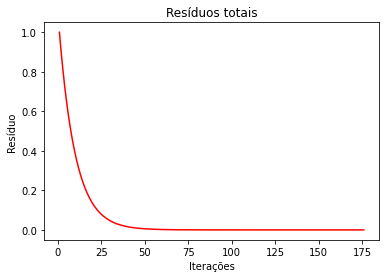

In [11]:
plot_residuals(statistics.maximum_residuals_per_iteration)

Por fim podemos ver como a função valor ficou para cada estado do grid em que o robo navega, assim como qual foi a política encontrada por ele.

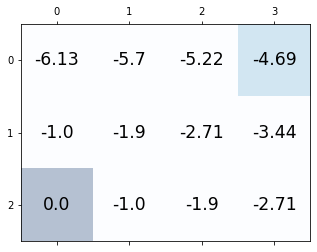

In [12]:
plot_navigation_value_function(mdp_navigation_01, value_function)

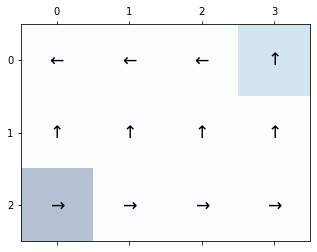

In [13]:
plot_navigation_policy(mdp_navigation_01, policy)

### 💡 Atividade 

Teste o algoritmo para para outros tamanhos de problema localizados na pasta "problem_files".

O que muda no comportamento do algoritmo? Por que?

In [14]:
#mdp_navigation_04 = read_problem_file(problem_file="problem_files/navigation_04.net")
#mdp_navigation_04.describe()

## Iteração de política

No algoritmo de _Iteração de política_ utilizamos uma abordagem um pouco diferente, onde ao invés de melhoramos a função valor através da _equação de Bellman_, buscamos melhorar a política em si.

Para isto o algorimo começa com uma política inicial $\pi^0$ e itera da seguinte forma:

1) o algoritmo avalia esta política encontrando a função para ela (etapa de _Avaliação da política_);
2) o algoritmo busca encontrar a melhor ação a função valor encontrada, caso esta ação seja diferente da política atual, ele atualiza a política (etapa de _Melhoria da política_).

O critério de parada neste algoritmo é a mudança da política. Caso ela não seja alterada após uma iteração, consideramos que a política encontrada é a ótima e que o algoritmo convergiu.

Na primeira etapa, chamada de _Avaliação de política_, montamos a seguinte equação para cada estado:

$ V(s) = R(s) + \gamma \sum_{s' \in S} P(s'|s, \pi^t(s)) V(s') $

Considerando $ S = \{ s_0, \dots, s_n \} $, teríamos as seguintes equações:

$ V(s_0) = R(s_0) + \gamma \sum_{s' \in S} P(s'|s_0, \pi^t(s_0)) V(s') $

$ \dots $ 

$ V(s_n) = R(s_n) + \gamma \sum_{s' \in S} P(s'|s_n, \pi^t(s_n)) V(s') $

Nas células abaixo, no método `evaluate_policy`, resolvemos este sistema de equações na forma vetorial, resolvendo a seguinte operação:

$ V^{\pi} = R^{\pi} + \gamma P^{\pi}V^{\pi} $

ou

$V^{\pi} = (I - \gamma P^{\pi})^{-1} R^{\pi} $ 

onde:

- $ V^{\pi} $ é uma matriz contendo a função valor;
- $ P^{\pi} $ é uma matriz transição considerando as ações executadas na política $\pi$;
- $ R^{\pi} $ é uma matriz contendo a função recompensa;
- $ I $ é uma matriz identidade.


In [15]:
def get_transition_matrix_for_policy(mdp, policy):
    """Constroi uma matriz de transição para uma política.
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    policy (dict[string] -> string): política para o qual encontraremos a matriz de transição
    Returns: matriz de transição para a política
    """
    state_count = len(mdp.states)
    transition_matrix_for_policy = np.matrix(np.zeros((state_count, state_count)))

    for index, state in enumerate(mdp.states):
        action = policy[state]
        transition_matrix = mdp.transition_matrix(action)
        transition_matrix_for_policy[index] = transition_matrix[index]

    return transition_matrix_for_policy

def evaluate_policy(policy, mdp, gamma):
    """Avalia uma política, encontrando a função valor para ela.
    policy (dict[string] -> string): política para o qual encontraremos a função valor
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    gamma (float): fator de desconto
    Returns: (dict[string] -> float): Função valor para a política
    """
    policy_reward_matrix = mdp.reward_matrix()
    policy_transition_matrix = get_transition_matrix_for_policy(mdp, policy)
    identity_matrix = np.identity(len(mdp.states))

    # compute value function as a system of equations
    value_function_matrix_for_policy = (identity_matrix - gamma * policy_transition_matrix).getI() * policy_reward_matrix

    value_function = {}

    for index, state in enumerate(mdp.states):
        value_function[state] = value_function_matrix_for_policy[index].item()

    return value_function

### Melhoria de política

Já na etapa de _Melhoria de política_, com a função valor em mãos, para cada estado, fazemos as seguintes operações:

1. Encontramos o valor para a melhor ação considerando a equação: 

$ V_{best}(s) = \max_{a \in A} \left\{ R(s) + \gamma \sum_{s' \in S} P(s'|s,a) V(s') \right\} $

2. Encontramos o valor para a ação atual considerando a equação:

$ V_{actual}(s) = R(s) + \gamma \sum_{s' \in S} P(s'|s, \pi^t(s)) V(s') $

Se $V_{best}(s) > V_{actual}(s)$, atualizamos a política atual com a melhor ação:

$ \pi(s) = arg\max_{a \in A} \left\{ R(s) + \gamma \sum_{s' \in S} P(s'|s,a) V(s') \right\} $

### 💡 Atividade

Dada a formulação acima, implemente a função `improve_policy` abaixo:

In [16]:
def improve_policy(policy, mdp, gamma, value_function):
    """Melhora uma política dada a função valor em questão
    policy (dict[string] -> string): política para o qual encontraremos a função valor
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    gamma (float): fator de desconto
    value_function (dict[string] -> float): Função valor para a política
    Returns:
    improved_policy (dict[string] -> string): política melhorada
    values_computed (int): número de vezes que a função valor foi calculada
    """
    return {}, 0 # implementar aqui

Por fim temos o algoritmo final, com o seguinte código abaixo:

In [17]:
def equal_policies(mdp, first_policy, second_policy):
    """Checa se duas políticas são iguas.
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    first_policy (dict[string] -> string): primeira política a ser comparada
    second_policy (dict[string] -> string): primeira política a ser comparada
    Returns: um booleano dizendo se as políticas são iguais ou não
    """
    for state in mdp.states:
        first_action = first_policy[state]
        second_action = second_policy[state]

        if first_action != second_action:
            return False

    return True

def policy_iteration(mdp, gamma = 0.9, initial_policy = None):
    """Executa o algoritmo Iteração de política.
    Parameters:
    mdp (EnumerativeMDP): MDP enumerativo a ser solucionado
    gamma (float): fator de desconto
    initial_policy (dict[string] -> string): política incial arbitrária
    Returns:
    policy (dict[string] -> string): política ótima
    value_function (dict[string] -> float): função valor ótima
    statistics (AlgorithmStatistics): estatísticas da execução do problema
    """
    policy = initial_policy

    if policy is None:
        first_action = mdp.actions[0]
        policy = dict(map(lambda state: (state, first_action), mdp.states))

    iterations = 0
    values = 0
    start = time.time()
    
    while True:
        iterations = iterations + 1

        value_function_for_policy = evaluate_policy(policy, mdp, gamma)
        improved_policy, values_computed = improve_policy(policy, mdp, gamma, value_function_for_policy)

        values += values_computed
        
        if equal_policies(mdp, policy, improved_policy):
            break

        policy = improved_policy

    # after finding the optimal policy, compute its value function and the statistics
    value_function = evaluate_policy(policy, mdp, gamma)
    
    end = time.time()
    
    statistics = AlgorithmStatistics(iterations, None, values, end-start)
    
    return policy, value_function, statistics

### Execuções

Iremos testar a execução do algoritmo com o problema `Navigation_01`. Este problema consiste em um robô tentando ir de um ponto a outro no mapa. As bordas do mapa estão estáveis e permitem que o robo chegue de uma ponta a outra sem problemas.

In [18]:
mdp_navigation_01 = read_problem_file(problem_file="problem_files/navigation_01.net")
mdp_navigation_01.describe()

,0
Estados,"broken-robot, robot-at-x01y01, robot-at-x01y02..."
Estado inicial,robot-at-x01y01
Meta,robot-at-x04y03


In [19]:
policy, value_function, statistics = policy_iteration(mdp_navigation_01)

statistics.describe()

,0
Iterações,4.000000
Bellman Backups,104.000000
Tempo de execução,0.023605


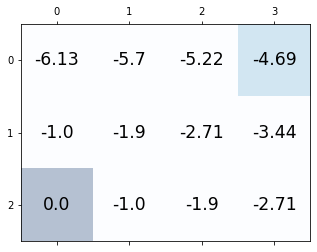

In [20]:
plot_navigation_value_function(mdp_navigation_01, value_function)

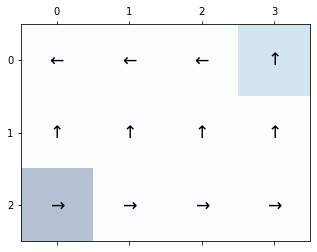

In [21]:
plot_navigation_policy(mdp_navigation_01, policy)

### 💡 Atividade 

Testem o algoritmo para para outros tamanhos de problema localizados na pasta `problem_files`.

O que muda no comportamento do algoritmo? Por que?

In [22]:
#mdp_navigation_04 = read_problem_file(problem_file="problem_files/navigation_04.net")
#mdp_navigation_04.describe()

--- 

## 🚚 Entrega

Você deve submeter esse arquivo de notebook (ou exportá-lo como html) via e-disciplinas contendo suas soluções para todas as seções identificadas como 💡 **Atividade**. Em particular você deve:

### Iteração de valor

1. Implementar função `bellman_backup`;
2. Implementar função `compute_maximum_residual`;
3. Testar algoritmo com diferentes configuração de problema e escrever sobre os resultados

### Iteração de política

1. Implementar função `improve_policy`;
2. Testar algoritmo com diferentes configuração de problema e escrever sobre os resultados.

